In [1]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 2.0MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/plant_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive/


In [2]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np 
import pickle
import matplotlib.pyplot as plt


with open(ROOT_PATH+'plants/train_data_crop224.pkl','rb') as f:
    x_train=pickle.load(f)

with open(ROOT_PATH+'plants/train_label.pkl','rb') as f:
    t_train=pickle.load(f)

with open(ROOT_PATH+'plants/test_data_crop224.pkl','rb') as f:
    x_test=pickle.load(f)

with open(ROOT_PATH+'plants/test_label.pkl','rb') as f:
    t_test=pickle.load(f)

with open(ROOT_PATH+'plants/plant_class.pkl','rb') as f:
    classes=pickle.load(f)


x_train=x_train.astype('float16')/255.
x_test=x_test.astype('float16')/255.
class_count=len(classes)
t_train=to_categorical(t_train,class_count)
t_test=to_categorical(t_test,class_count)


def prepare_new_model(input_shape, class_count):
    # 学習済みモデルの取り出し
    feature_extractor = EfficientNetB0(input_shape=input_shape, weights=None, include_top=False)
    model = Sequential(feature_extractor)
    # 植物分類器を引っ付ける
    model.add(GlobalAveragePooling2D())
    model.add(Dense(class_count))
    model.add(Activation('softmax'))

    # x = feature_extractor.output
    # x = GlobalAveragePooling2D()(x)
    # x = Dropout(rate=0.25)(x)
    # x = Dense(class_count, activation='softmax')(x)
    # 新たなモデルの定義
    # model = Model(inputs=feature_extractor.input, outputs=x)
    print(model.summary())
    return model


def train(x_train,t_train,x_test,t_test,epochs, batch_size, input_shape, class_count):
    # モデルの生成
    model = prepare_new_model(input_shape, class_count)
    opt=Adam()
    # コンパイル
    model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
    # fit
    model.fit(x_train,t_train,batch_size,epochs)
    return model


epochs = 50
batch_size = 128
input_shape = (224, 224, 3)
model=train(x_train,t_train,x_test,t_test,epochs, batch_size, input_shape, class_count)
scores=model.evaluate(x_test,t_test,verbose=1)
print('Test loss: ',scores[0])
print('Test accuracy: ',scores[1])    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 302)               386862    
_________________________________________________________________
activation (Activation)      (None, 302)               0         
Total params: 4,436,433
Trainable params: 4,394,410
Non-trainable params: 42,023
_________________________________________________________________
None
Epoch 1/50
151/151 [==============================] - 143s 777ms/step - loss: 5.7905 - accuracy: 0.0055
Epoch 2/50
151/151 [==============================] - 117s 775ms/step - loss: 5.1323 - accuracy: 0.0250
Epoch 3/50
151/151 [======

モナルダ・ベルガモ


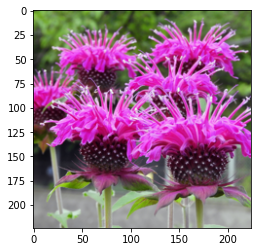

In [5]:
img=x_test[100]
label=t_test[100]
print(classes[label])
plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with open(ROOT_PATH+'plants/train_data_crop224.pkl','rb') as f:
    x_train=pickle.load(f)
x_train=x_train.astype('f')/255
img=x_train[100]
plt.imshow(img)

x=np.array([img])
y=model.predict(x,batch_size=1,verbose=1)
print(y.argmax())
classes[y.argmax()]